In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

address_dataset_train = "train.csv"
data_train = pd.read_csv(address_dataset_train,sep= ",", low_memory=False, encoding='utf-8-sig', skipinitialspace=True)

x = data_train.drop(data_train.columns[[0, 1]], axis=1)
y = data_train['target']

#divide in testset and trainset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#fit model to train Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

#fit model to train Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

#fit model to train Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=30, max_depth=5, random_state=1)
rf.fit(x_train, y_train.values.ravel())





In [5]:
# variable 81 and variable 12 were the two most important features, thats why I computed those two. 
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary with the first 50 points in the test set
numpy_x = x[['var_81','var_12']].as_matrix()
numpy_y = y.values

# This is necessary if pandas read the CSV files as integers
# (seems to depend on version/OS)
numpy_x = numpy_x.astype(float)

#fit model to train Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(numpy_x, numpy_y)

plot_decision_regions(numpy_x[:500, :], numpy_y[:500], clf=linear, res=0.1);
plt.title('Linear Regression')
plt.show()

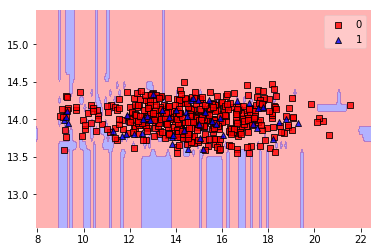

In [6]:
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary with the first 50 points in the test set
numpy_x = x[['var_81','var_12']].as_matrix()
numpy_y = y.values

# This is necessary if pandas read the CSV files as integers
# (seems to depend on version/OS)
numpy_x = numpy_x.astype(float)

# Rebuild the classifier 
# (a classifier trained on pandas data doesn't interoperate well with pure numpy data)
tree = DecisionTreeClassifier()
tree.fit(numpy_x, numpy_y)

plot_decision_regions(numpy_x[:500, :], numpy_y[:500], clf=tree, res=0.1);
plt.title('Decision Tree Classifier')
plt.show()

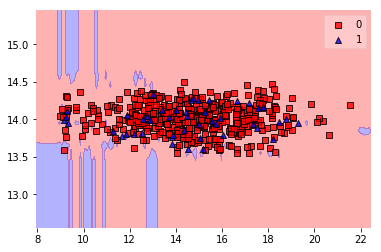

In [7]:
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary with the first 50 points in the test set
numpy_x = x[['var_81','var_12']].as_matrix()
numpy_y = y.values

# This is necessary if pandas read the CSV files as integers
# (seems to depend on version/OS)
numpy_x = numpy_x.astype(float)

# Rebuild the classifier 
# (a classifier trained on pandas data doesn't interoperate well with pure numpy data)
rf = RandomForestRegressor()
rf.fit(numpy_x, numpy_y)

plot_decision_regions(numpy_x[:500, :], numpy_y[:500], clf=rf, res=0.1);
plt.title('Random Forest Regressor')
plt.show()

In [ ]:
# dont know if this works, never gave me an output! 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

# The linear classifier doesn't produce class probabilities by default. We'll retrain it for probabilities.
linear = SVC(kernel='linear', probability=True)
linear.fit(x_train, y_train)

# We'll need class probabilities from each of the classifiers
y_linear = linear.predict_proba(x_test)
y_tree  = tree.predict_proba(x_test)
y_rf   = rf.predict_proba(x_test)

# Compute the points on the curve
# We pass the probability of the second class (KIA) as the y_score
curve_linear = sklearn.metrics.roc_curve(y_test, y_linear[:, 1])
curve_tree   = sklearn.metrics.roc_curve(y_test, y_tree[:, 1])
curve_rf    = sklearn.metrics.roc_curve(y_test, y_rf[:, 1])

# Compute Area Under the Curve
auc_linear = auc(curve_linear[0], curve_linear[1])
auc_tree   = auc(curve_tree[0], curve_tree[1])
auc_rf    = auc(curve_rf[0], curve_rf[1])

plt.plot(curve_linear[0], curve_linear[1], label='linear (area = %0.2f)' % auc_linear)
plt.plot(curve_tree[0], curve_tree[1], label='tree (area = %0.2f)' % auc_tree)
plt.plot(curve_rf[0], curve_rf[1], label='rf (area = %0.2f)'% auc_rf)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.legend()
plt.show()
